# Ordenamiento de Arrays en NumPy

In [ ]:
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L) # Nos devuelve una copia ordenada

[1, 1, 2, 3, 4, 5, 6, 9]

In [ ]:
print(L)

[3, 1, 4, 1, 5, 9, 2, 6]


In [ ]:
L.sort()
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [ ]:
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [ ]:
variable_ejemplo = L.sort()

In [ ]:
print(variable_ejemplo)

None


In [ ]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

## Ordenamiento rápido con Numpy: np.sort y np.argsort

In [ ]:
import numpy as np

x = np.array([2, 1, 4, 5, 3])
np.sort(x)

array([1, 2, 3, 4, 5])

In [ ]:
x.sort()
print(x)

[1 2 3 4 5]


In [ ]:
x = np.array([2, 1, 4, 5, 3])
i = np.argsort(x)
print(i)

[1 0 4 2 3]


In [ ]:
x[i]

array([1, 2, 3, 4, 5])

## Ordenando Filas y Columnas

In [ ]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [ ]:
# Ordenar cada columna
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [ ]:
# Ordenar cada fila
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

## ordenamientos Parciales

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
X = rng.integers(0, 10, (4, 6))
np.partition(X, 2, axis=1)

array([[4, 4, 5, 6, 7, 8],
       [0, 0, 2, 4, 5, 8],
       [1, 2, 6, 7, 8, 8],
       [0, 3, 4, 7, 8, 9]])

## k-Nearest Neighbors

In [ ]:
X = rng.random((10, 2))
print(X)

[[0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]
 [0.75808774 0.35452597]
 [0.97069802 0.89312112]
 [0.7783835  0.19463871]
 [0.466721   0.04380377]
 [0.15428949 0.68304895]
 [0.74476216 0.96750973]]


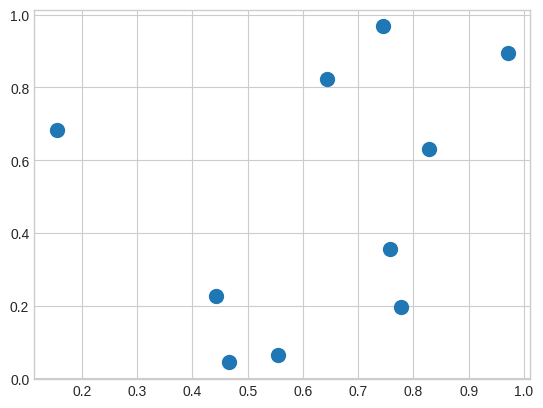

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100)

Ahora calcularemos la distancia entre cada par de puntos.
Recordemos que la distancia al cuadrado entre dos puntos es la suma de las diferencias al cuadrado en cada dimensión;
usando el eficiente broadcasting  y las rutinas de agregación  proporcionadas por NumPy, podemos calcular la matriz de distancias al cuadrado en una sola línea de código:

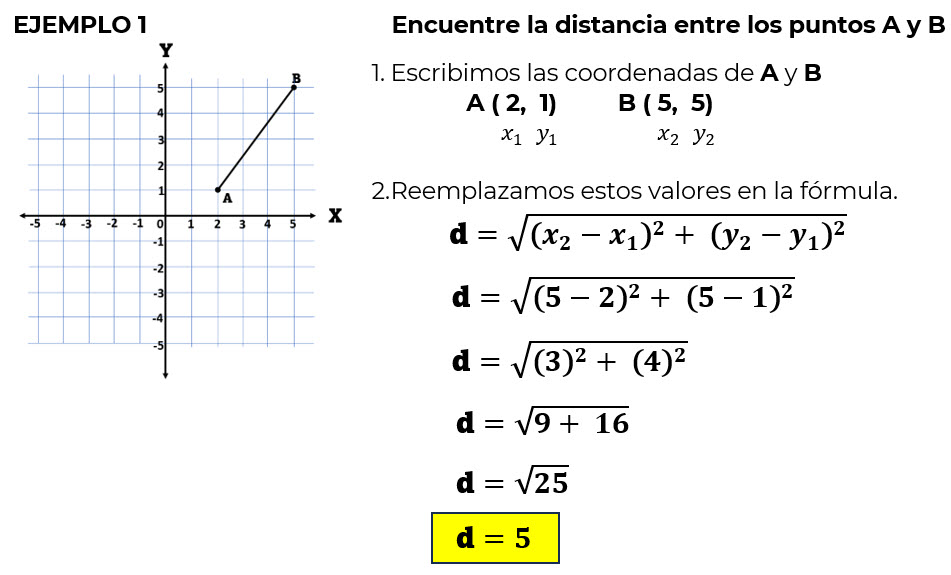

In [ ]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis,:]) ** 2, axis=-1)
# imprimir la matriz de distancias de forma clara, con 2 decimales y suprimiendo números muy pequeños
print(np.array_str(dist_sq, precision=2, suppress_small=True))

[[0.   0.39 0.58 0.07 0.23 0.11 0.41 0.64 0.26 0.03]
 [0.39 0.   0.04 0.31 0.12 0.72 0.11 0.03 0.29 0.64]
 [0.58 0.04 0.   0.4  0.13 0.86 0.07 0.01 0.54 0.85]
 [0.07 0.31 0.4  0.   0.08 0.09 0.19 0.48 0.46 0.12]
 [0.23 0.12 0.13 0.08 0.   0.34 0.03 0.18 0.47 0.38]
 [0.11 0.72 0.86 0.09 0.34 0.   0.52 0.98 0.71 0.06]
 [0.41 0.11 0.07 0.19 0.03 0.52 0.   0.12 0.63 0.6 ]
 [0.64 0.03 0.01 0.48 0.18 0.98 0.12 0.   0.51 0.93]
 [0.26 0.29 0.54 0.46 0.47 0.71 0.63 0.51 0.   0.43]
 [0.03 0.64 0.85 0.12 0.38 0.06 0.6  0.93 0.43 0.  ]]


Ahora lo vemos paso por paso:

In [ ]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [ ]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [ ]:
dist_sql = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [ ]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [ ]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

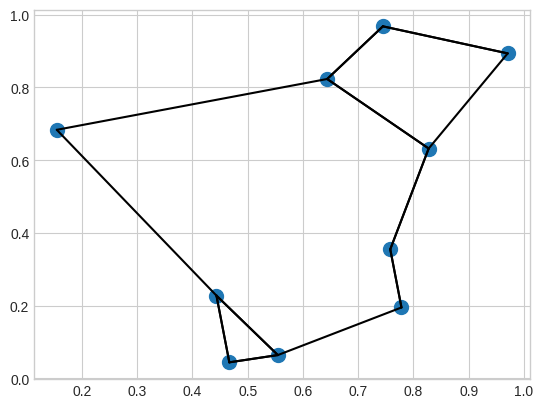

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=100)

K = 2

for i in range(X.shape[0]):
  for j in nearest_partition[i, :K+1]:
    # Dibuja una línea desde X[i] hasta X[j]
    plt.plot(*zip(X[j], X[i]), color='black')

Cada punto en el gráfico tiene líneas dibujadas hacia sus dos vecinos más cercanos. A primera vista, podría parecer extraño que algunos de los puntos tengan más de dos líneas saliendo de ellos: esto se debe al hecho de que si el punto A es uno de los dos vecinos más cercanos del punto B, esto no implica necesariamente que el punto B sea uno de los dos vecinos más cercanos del punto A.

Aunque el broadcasting y la ordenación por filas de este enfoque puedan parecer menos directos que escribir un bucle, resulta ser una forma muy eficiente de operar con estos datos en Python. Podrías sentirte tentado a hacer el mismo tipo de operación recorriendo manualmente los datos y ordenando cada conjunto de vecinos individualmente, pero esto casi con certeza conduciría a un algoritmo más lento que la versión vectorizada que usamos. La belleza de este enfoque es que está escrito de una manera que es agnóstica al tamaño de los datos de entrada: podríamos calcular igualmente los vecinos entre 100 o 1.000.000 de puntos en cualquier número de dimensiones, y el código se vería igual.

Finalmente, señalaré que cuando se realizan búsquedas de vecinos más cercanos muy grandes, existen algoritmos basados en árboles y/o aproximados que pueden escalar como  [𝑁log𝑁]  o mejor en lugar del  [𝑁2]  del algoritmo de fuerza bruta.


```python
import numpy as np


# 1.1 Crea un array unidimensional de 20 valores aleatorios enteros entre 0 y 100
# Tu código aquí

# 1.2 Utiliza np.sort() para ordenar el array y almacénalo en una nueva variable
# 1.2.1 Ordena de menor a mayor (ascendente)
# Tu código aquí

# 1.2.2 Ordena de mayor a menor (descendente)
# Pista: puedes usar np.sort() y luego invertir el resultado, o usar un truco con el signo negativo
# Tu código aquí

# 1.3 Utiliza el método .sort() para ordenar el array original en su lugar
# Tu código aquí

# 1.4 Crea una matriz X de forma (5, 4) con valores aleatorios enteros entre 0 y 50
# Tu código aquí

# 1.5 Ordena la matriz X a lo largo del eje 0 (por columnas)
# Tu código aquí

# 1.6 Ordena la matriz X a lo largo del eje 1 (por filas)
# Tu código aquí

# 1.7 Utiliza np.argsort() para obtener los índices que ordenarían el array original del paso 1.1
# 1.7.1 Obtén los índices para ordenamiento ascendente
# Tu código aquí

# 1.7.2 Obtén los índices para ordenamiento descendente
# Pista: usa el parámetro kind de np.argsort() para probar diferentes algoritmos de ordenamiento
# (por ejemplo, 'quicksort', 'mergesort', 'heapsort')
# Tu código aquí

# 1.8 Utiliza np.partition() para colocar los 5 valores más pequeños de X en las primeras posiciones
# de cada fila, sin importar el orden entre ellos
# Tu código aquí

# 1.9 Utiliza np.argpartition() para obtener los índices que particionarían el array original
# para los 3 valores más pequeños
# Tu código aquí
```


In [ ]:
rng = np.random.default_rng(seed=42)
# 1.1 Crea un array unidimensional de 20 valores aleatorios enteros entre 0 y 100
arr = rng.integers(0, 101, 20)
print(arr)

# 1.2 Utiliza np.sort() para ordenar el array y almacénalo en una nueva variable
# 1.2.1 Ordena de menor a mayor (ascendente)
arr_ordenado_asc = np.sort(arr)
print(arr_ordenado_asc)


# 1.2.2 Ordena de mayor a menor (descendente)
# Pista: puedes usar np.sort() y luego invertir el resultado, o usar un truco con el signo negativo
arr_ordenado_desc1 = np.sort(arr)[::-1]
arr_ordenado_desc2 = -np.sort(-arr)
print(arr_ordenado_desc1)
print(arr_ordenado_desc2)

# 1.3 Utiliza el método .sort() para ordenar el array original en su lugar
arr.sort()
print(arr)

# 1.4 Crea una matriz X de forma (5, 4) con valores aleatorios enteros entre 0 y 50
X = rng.integers(0, 51, (5, 4))
print(X)

# 1.5 Ordena la matriz X a lo largo del eje 0 (por columnas)
X_ordenada_columnas = np.sort(X, axis=0)
print(X_ordenada_columnas)

# 1.6 Ordena la matriz X a lo largo del eje 1 (por filas)
X_ordenada_filas = np.sort(X, axis=1)
print(X_ordenada_filas)


# 1.7 Utiliza np.argsort() para obtener los índices que ordenarían el array original del paso 1.1
# 1.7.1 Obtén los índices para ordenamiento ascendente
arr_original = rng.integers(0, 101, 20)
indices_ordenados = np.argsort(arr_original)
print(indices_ordenados)

# 1.7.2 Obtén los índices para ordenamiento descendente
# Pista: usa el parámetro kind de np.argsort() para probar diferentes algoritmos de ordenamiento
# (por ejemplo, 'quicksort', 'mergesort', 'heapsort')
indices_desc1 = np.argsort(arr_original)[::-1]
indices_desc2 = np.argsort(-arr_original)
print(indices_desc1)
print(indices_desc2)

indices_quicksort = np.argsort(arr_original, kind='quicksort')
indices_mergesort = np.argsort(arr_original, kind='mergesort')
indices_heapsort = np.argsort(arr_original, kind='heapsort')

print("Usando quicksort:", indices_quicksort)
print("Usando mergesort:", indices_mergesort)
print("Usando heapsort:", indices_heapsort)

# 1.8 Utiliza np.partition() para colocar los 2 valores más pequeños de X en las primeras posiciones
# de cada fila, sin importar el orden entre ellos
X_particionada = np.partition(X, 2, axis=1)
print(X_particionada)

# 1.9 Utiliza np.argpartition() para obtener los índices que particionarían el array original
# para los 3 valores más pequeños
indices_particion = np.argpartition(arr_original, 3)
print(indices_particion)


[ 9 78 66 44 43 86  8 70 20  9 53 98 74 76 72 79 51 12 84 45]
[ 8  9  9 12 20 43 44 45 51 53 66 70 72 74 76 78 79 84 86 98]
[98 86 84 79 78 76 74 72 70 66 53 51 45 44 43 20 12  9  9  8]
[98 86 84 79 78 76 74 72 70 66 53 51 45 44 43 20 12  9  9  8]
[ 8  9  9 12 20 43 44 45 51 53 66 70 72 74 76 78 79 84 86 98]
[[25 18  9 47]
 [39 32 20 41]
 [27 22 22 11]
 [ 4 28 45  3]
 [43 42 14 32]]
[[ 4 18  9  3]
 [25 22 14 11]
 [27 28 20 32]
 [39 32 22 41]
 [43 42 45 47]]
[[ 9 18 25 47]
 [20 32 39 41]
 [11 22 22 27]
 [ 3  4 28 45]
 [14 32 42 43]]
[15  4 17  0 11  3 12  6 13 14 16  8 19  2 18  1 10  9  7  5]
[ 5  7  9 10  1 18  2 19  8 16 14 13  6 12  3 11  0 17  4 15]
[ 5  7  9  1 10 18  2  8 19 16 14 13  6 12  3 11  0 17  4 15]
Usando quicksort: [15  4 17  0 11  3 12  6 13 14 16  8 19  2 18  1 10  9  7  5]
Usando mergesort: [15  4 17  0 11  3 12  6 13 14 16  8 19  2 18  1 10  9  7  5]
Usando heapsort: [15  4 17  0 11  3 12  6 13 14 16 19  8  2 18 10  1  9  7  5]
[[ 9 18 25 47]
 [20 32 39 41]
 [11 22